In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [56]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb1.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x)

tensor([0, 1, 4, 4, 0, 2, 5, 2, 1, 2, 5, 5, 0, 2, 2, 1, 2, 3, 2, 0, 1, 1, 3, 1,
        4, 5, 2, 1, 0, 4, 4, 1, 1, 4, 2, 3, 0, 5, 5, 0, 4, 4, 1, 5, 1, 0, 0, 2,
        5, 0, 3, 2, 0, 1, 1, 5, 2, 2, 0, 1, 0, 5, 3, 2, 1, 2, 0, 0, 4, 0, 1, 3,
        0, 2, 1, 5, 0, 5, 5, 0, 5, 5, 4, 3, 5, 4, 1, 2, 2, 0, 4, 5, 1, 5, 2, 5,
        5, 2, 2, 2, 5, 5, 5, 5, 4, 0, 1, 5, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 2, 5,
        1, 5, 5, 0, 2, 0, 0, 3, 4, 5, 1, 2, 0, 2, 5, 1, 5, 5, 2, 4, 3, 4, 5, 2,
        2, 1, 5, 1, 5, 2, 2, 1, 4, 2, 5, 4, 2, 4, 1, 0, 2, 5, 1, 4, 4, 0, 5, 5,
        5, 5, 0, 4, 1, 3, 5, 0, 1, 3, 2, 0, 2, 2, 0, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        2, 5, 2, 1, 1, 2, 0, 3, 4, 4, 1, 4, 3, 2, 0, 5, 0, 1, 5, 3, 1, 5, 5, 2,
        0, 1, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 3, 3, 5, 5, 1, 1, 5, 5, 2, 5, 5, 1, 4, 5, 2, 5, 3, 3, 5, 5, 5, 5, 1,
        3, 5, 1, 5, 5, 5, 5, 5, 5, 3, 2])


In [71]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb2.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x.shape)

torch.Size([10000])


In [64]:
pi=torch.tensor([0.5,0.5])
a=torch.tensor([[0.95,0.05],[0.05,0.95]])
b=torch.tensor([[1/6,1/6,1/6,1/6,1/6,1/6],[.1,.1,.1,.1,.1,0.5]])
print(pi)
print(a)
print(b)

tensor([0.5000, 0.5000])
tensor([[0.9500, 0.0500],
        [0.0500, 0.9500]])
tensor([[0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.5000]])


In [27]:
def Viterbi(x,a,b,pi):
    T = x.shape[0]
    C=torch.zeros((2,T))
    Ptr=torch.zeros((2,T))
    la=torch.log(a)
    lb=torch.log(b)
    C[:,0]=torch.log(b[:,x[0]]*pi)
    for t in range(1,T):
        li=la+C[:,t-1].view(-1,1)
        mli,amli=torch.max(li,dim=0)
        C[:,t]=lb[:,x[t]]+mli
        Ptr[:,t]=amli
    y=torch.zeros(T).long()
    y[T-1]=torch.argmax(C[:,T-1])
    for t in range(T-1,0,-1):
        y[t-1]=Ptr[y[t],t]
    return y
Viterbi(x,a,b,pi)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
def fwd(x,a,b,pi):
    T = x.shape[0]
    al=torch.zeros((2,T),device=x.device)
    al[:,0]=b[:,x[0]]*pi
    for t in range(1,T):
        li=a*al[:,t-1].view(-1,1)
        sli=b[:,x[t]]*torch.sum(li,dim=0)
        al[:,t]=sli/torch.sum(sli)
    return al

def bk(x,a,b,pi):
    T = x.shape[0]
    be=torch.ones((2,T),device=x.device)
    for t in range(T-1,0,-1):
        li=a*be[:,t].view(1,-1)*b[:,x[t]].view(1,-1)
        sli=torch.sum(li,dim=1)
        be[:,t-1]=sli/torch.sum(sli)
    return be

al=fwd(x,a,b,pi)
be=bk(x,a,b,pi)
print(al[0,135]/al[1,135], be[0,135]/be[1,135])



tensor(2.2359) tensor(0.5083)


In [72]:
pi=torch.tensor([0.5,0.5])
a=torch.rand(2,2)
b=torch.rand(2,6)
a=a/torch.sum(a,1).view(-1,1)
b=b/torch.sum(b,1).view(-1,1)
print(a)
print(b)

tensor([[0.8957, 0.1043],
        [0.3928, 0.6072]])
tensor([[0.3013, 0.2194, 0.0104, 0.2368, 0.0083, 0.2238],
        [0.1459, 0.2338, 0.2337, 0.1080, 0.1978, 0.0809]])


In [46]:
x=x.to(device)
a=a.to(device)
b=b.to(device)
pi=pi.to(device)

In [73]:
for it in range(1000):
    # E step
    al=fwd(x,a,b,pi)
    be=bk(x,a,b,pi)
    bb=be*b[:,x]
    bb=bb[:,1:].unsqueeze(0)
    xi=al[:,:-1].unsqueeze(1)*a.unsqueeze(2)*bb
    xi=xi/torch.sum(xi,dim=[0,1])
    ga=al*be
    ga=ga/torch.sum(ga,dim=0)
    # M step
    pi=ga[:,0]
    a=torch.sum(xi,dim=2)#/torch.sum(ga[:,:-1],dim=1)
    a=a/torch.sum(a,dim=1).view(-1,1)
    sga=torch.sum(ga,dim=1)
    for k in range(b.shape[1]):
        b[:,k]=torch.sum(ga[:,x==k],dim=1)
    b=b/sga.view(-1,1)
    print(a)
    print(b)

tensor([[0.7465, 0.2535],
        [0.2430, 0.7570]])
tensor([[0.2839, 0.2307, 0.0359, 0.2888, 0.0198, 0.1410],
        [0.1131, 0.1744, 0.3351, 0.1059, 0.2242, 0.0474]])
tensor([[0.7201, 0.2799],
        [0.2536, 0.7464]])
tensor([[0.2791, 0.2301, 0.0456, 0.2861, 0.0229, 0.1363],
        [0.1220, 0.1766, 0.3183, 0.1132, 0.2159, 0.0541]])
tensor([[0.7024, 0.2976],
        [0.2602, 0.7398]])
tensor([[0.2754, 0.2295, 0.0536, 0.2842, 0.0249, 0.1324],
        [0.1279, 0.1779, 0.3067, 0.1177, 0.2108, 0.0589]])
tensor([[0.6898, 0.3102],
        [0.2647, 0.7353]])
tensor([[0.2724, 0.2290, 0.0605, 0.2828, 0.0264, 0.1291],
        [0.1321, 0.1790, 0.2980, 0.1208, 0.2075, 0.0626]])
tensor([[0.6804, 0.3196],
        [0.2680, 0.7320]])
tensor([[0.2699, 0.2284, 0.0665, 0.2817, 0.0274, 0.1262],
        [0.1353, 0.1798, 0.2910, 0.1230, 0.2053, 0.0655]])
tensor([[0.6732, 0.3268],
        [0.2705, 0.7295]])
tensor([[0.2677, 0.2280, 0.0719, 0.2808, 0.0280, 0.1236],
        [0.1379, 0.1805, 0.2853, 0.1247

tensor([[0.6819, 0.3181],
        [0.2760, 0.7240]])
tensor([[0.2427, 0.2214, 0.1640, 0.2651, 0.0183, 0.0885],
        [0.1568, 0.1852, 0.2099, 0.1349, 0.2159, 0.0973]])
tensor([[0.6832, 0.3168],
        [0.2758, 0.7242]])
tensor([[0.2425, 0.2214, 0.1650, 0.2647, 0.0182, 0.0883],
        [0.1568, 0.1851, 0.2091, 0.1351, 0.2164, 0.0975]])
tensor([[0.6844, 0.3156],
        [0.2757, 0.7243]])
tensor([[0.2423, 0.2214, 0.1660, 0.2642, 0.0180, 0.0881],
        [0.1568, 0.1851, 0.2083, 0.1353, 0.2168, 0.0977]])
tensor([[0.6856, 0.3144],
        [0.2755, 0.7245]])
tensor([[0.2422, 0.2213, 0.1670, 0.2638, 0.0178, 0.0879],
        [0.1568, 0.1850, 0.2076, 0.1355, 0.2172, 0.0978]])
tensor([[0.6868, 0.3132],
        [0.2754, 0.7246]])
tensor([[0.2420, 0.2213, 0.1679, 0.2633, 0.0177, 0.0878],
        [0.1569, 0.1850, 0.2068, 0.1357, 0.2177, 0.0980]])
tensor([[0.6879, 0.3121],
        [0.2753, 0.7247]])
tensor([[0.2418, 0.2213, 0.1688, 0.2629, 0.0176, 0.0877],
        [0.1569, 0.1850, 0.2061, 0.1359

tensor([[0.7248, 0.2752],
        [0.2720, 0.7280]])
tensor([[0.2380, 0.2204, 0.1900, 0.2474, 0.0169, 0.0873],
        [0.1559, 0.1838, 0.1872, 0.1439, 0.2301, 0.0990]])
tensor([[0.7254, 0.2746],
        [0.2720, 0.7280]])
tensor([[0.2379, 0.2204, 0.1902, 0.2472, 0.0170, 0.0873],
        [0.1558, 0.1838, 0.1870, 0.1441, 0.2303, 0.0990]])
tensor([[0.7260, 0.2740],
        [0.2720, 0.7280]])
tensor([[0.2379, 0.2203, 0.1904, 0.2470, 0.0170, 0.0874],
        [0.1558, 0.1838, 0.1868, 0.1442, 0.2304, 0.0990]])
tensor([[0.7266, 0.2734],
        [0.2720, 0.7280]])
tensor([[0.2378, 0.2203, 0.1906, 0.2468, 0.0171, 0.0874],
        [0.1558, 0.1838, 0.1866, 0.1443, 0.2306, 0.0990]])
tensor([[0.7271, 0.2729],
        [0.2719, 0.7281]])
tensor([[0.2378, 0.2203, 0.1908, 0.2466, 0.0172, 0.0874],
        [0.1558, 0.1838, 0.1865, 0.1444, 0.2307, 0.0989]])
tensor([[0.7277, 0.2723],
        [0.2719, 0.7281]])
tensor([[0.2377, 0.2202, 0.1909, 0.2464, 0.0173, 0.0875],
        [0.1557, 0.1838, 0.1863, 0.1445

tensor([[0.7498, 0.2502],
        [0.2714, 0.7286]])
tensor([[0.2356, 0.2186, 0.1945, 0.2405, 0.0225, 0.0883],
        [0.1545, 0.1840, 0.1822, 0.1465, 0.2343, 0.0985]])
tensor([[0.7503, 0.2497],
        [0.2714, 0.7286]])
tensor([[0.2355, 0.2185, 0.1945, 0.2404, 0.0227, 0.0883],
        [0.1545, 0.1840, 0.1822, 0.1465, 0.2344, 0.0985]])
tensor([[0.7508, 0.2492],
        [0.2714, 0.7286]])
tensor([[0.2355, 0.2185, 0.1945, 0.2403, 0.0228, 0.0884],
        [0.1545, 0.1840, 0.1822, 0.1465, 0.2344, 0.0985]])
tensor([[0.7513, 0.2487],
        [0.2714, 0.7286]])
tensor([[0.2354, 0.2185, 0.1945, 0.2402, 0.0230, 0.0884],
        [0.1544, 0.1840, 0.1821, 0.1465, 0.2345, 0.0985]])
tensor([[0.7518, 0.2482],
        [0.2714, 0.7286]])
tensor([[0.2354, 0.2184, 0.1946, 0.2401, 0.0231, 0.0884],
        [0.1544, 0.1840, 0.1821, 0.1465, 0.2345, 0.0985]])
tensor([[0.7523, 0.2477],
        [0.2714, 0.7286]])
tensor([[0.2353, 0.2184, 0.1946, 0.2400, 0.0233, 0.0884],
        [0.1544, 0.1840, 0.1820, 0.1465

tensor([[0.7754, 0.2246],
        [0.2717, 0.7283]])
tensor([[0.2329, 0.2167, 0.1950, 0.2362, 0.0304, 0.0887],
        [0.1529, 0.1842, 0.1808, 0.1460, 0.2375, 0.0987]])
tensor([[0.7760, 0.2240],
        [0.2717, 0.7283]])
tensor([[0.2329, 0.2167, 0.1950, 0.2362, 0.0306, 0.0887],
        [0.1528, 0.1842, 0.1808, 0.1460, 0.2375, 0.0987]])
tensor([[0.7765, 0.2235],
        [0.2717, 0.7283]])
tensor([[0.2328, 0.2167, 0.1950, 0.2361, 0.0308, 0.0887],
        [0.1528, 0.1842, 0.1808, 0.1459, 0.2376, 0.0987]])
tensor([[0.7771, 0.2229],
        [0.2717, 0.7283]])
tensor([[0.2327, 0.2166, 0.1950, 0.2360, 0.0309, 0.0887],
        [0.1528, 0.1842, 0.1807, 0.1459, 0.2377, 0.0987]])
tensor([[0.7776, 0.2224],
        [0.2717, 0.7283]])
tensor([[0.2327, 0.2166, 0.1951, 0.2359, 0.0311, 0.0887],
        [0.1527, 0.1842, 0.1807, 0.1459, 0.2378, 0.0987]])
tensor([[0.7782, 0.2218],
        [0.2717, 0.7283]])
tensor([[0.2326, 0.2166, 0.1951, 0.2358, 0.0313, 0.0887],
        [0.1527, 0.1842, 0.1807, 0.1459

tensor([[0.8039, 0.1961],
        [0.2728, 0.7272]])
tensor([[0.2298, 0.2150, 0.1953, 0.2319, 0.0390, 0.0889],
        [0.1506, 0.1840, 0.1792, 0.1446, 0.2425, 0.0991]])
tensor([[0.8045, 0.1955],
        [0.2728, 0.7272]])
tensor([[0.2298, 0.2149, 0.1953, 0.2318, 0.0392, 0.0889],
        [0.1505, 0.1840, 0.1792, 0.1445, 0.2426, 0.0991]])
tensor([[0.8051, 0.1949],
        [0.2728, 0.7272]])
tensor([[0.2297, 0.2149, 0.1954, 0.2317, 0.0394, 0.0890],
        [0.1505, 0.1840, 0.1791, 0.1445, 0.2428, 0.0991]])
tensor([[0.8057, 0.1943],
        [0.2729, 0.7271]])
tensor([[0.2296, 0.2148, 0.1954, 0.2317, 0.0395, 0.0890],
        [0.1504, 0.1840, 0.1791, 0.1445, 0.2429, 0.0992]])
tensor([[0.8063, 0.1937],
        [0.2729, 0.7271]])
tensor([[0.2296, 0.2148, 0.1954, 0.2316, 0.0397, 0.0890],
        [0.1504, 0.1839, 0.1791, 0.1444, 0.2430, 0.0992]])
tensor([[0.8069, 0.1931],
        [0.2729, 0.7271]])
tensor([[0.2295, 0.2148, 0.1954, 0.2315, 0.0399, 0.0890],
        [0.1503, 0.1839, 0.1790, 0.1444

tensor([[0.8342, 0.1658],
        [0.2749, 0.7251]])
tensor([[0.2264, 0.2132, 0.1959, 0.2274, 0.0479, 0.0893],
        [0.1475, 0.1834, 0.1766, 0.1424, 0.2505, 0.0997]])
tensor([[0.8348, 0.1652],
        [0.2749, 0.7251]])
tensor([[0.2263, 0.2132, 0.1959, 0.2273, 0.0480, 0.0893],
        [0.1474, 0.1833, 0.1765, 0.1424, 0.2507, 0.0997]])
tensor([[0.8354, 0.1646],
        [0.2750, 0.7250]])
tensor([[0.2262, 0.2132, 0.1959, 0.2272, 0.0482, 0.0893],
        [0.1473, 0.1833, 0.1764, 0.1423, 0.2509, 0.0997]])
tensor([[0.8361, 0.1639],
        [0.2750, 0.7250]])
tensor([[0.2262, 0.2131, 0.1959, 0.2271, 0.0484, 0.0893],
        [0.1472, 0.1833, 0.1764, 0.1423, 0.2511, 0.0997]])
tensor([[0.8367, 0.1633],
        [0.2751, 0.7249]])
tensor([[0.2261, 0.2131, 0.1959, 0.2270, 0.0486, 0.0893],
        [0.1472, 0.1833, 0.1763, 0.1422, 0.2514, 0.0997]])
tensor([[0.8373, 0.1627],
        [0.2751, 0.7249]])
tensor([[0.2260, 0.2131, 0.1959, 0.2269, 0.0488, 0.0894],
        [0.1471, 0.1833, 0.1762, 0.1421

tensor([[0.8651, 0.1349],
        [0.2782, 0.7218]])
tensor([[0.2226, 0.2116, 0.1965, 0.2227, 0.0568, 0.0898],
        [0.1433, 0.1821, 0.1723, 0.1391, 0.2629, 0.1003]])
tensor([[0.8657, 0.1343],
        [0.2782, 0.7218]])
tensor([[0.2225, 0.2116, 0.1965, 0.2226, 0.0570, 0.0898],
        [0.1432, 0.1821, 0.1722, 0.1391, 0.2632, 0.1003]])
tensor([[0.8664, 0.1336],
        [0.2783, 0.7217]])
tensor([[0.2224, 0.2116, 0.1965, 0.2225, 0.0572, 0.0898],
        [0.1431, 0.1821, 0.1721, 0.1390, 0.2635, 0.1003]])
tensor([[0.8670, 0.1330],
        [0.2784, 0.7216]])
tensor([[0.2224, 0.2115, 0.1965, 0.2224, 0.0574, 0.0898],
        [0.1430, 0.1820, 0.1720, 0.1389, 0.2638, 0.1003]])
tensor([[0.8676, 0.1324],
        [0.2785, 0.7215]])
tensor([[0.2223, 0.2115, 0.1966, 0.2223, 0.0575, 0.0898],
        [0.1428, 0.1820, 0.1719, 0.1388, 0.2642, 0.1003]])
tensor([[0.8683, 0.1317],
        [0.2786, 0.7214]])
tensor([[0.2222, 0.2115, 0.1966, 0.2222, 0.0577, 0.0898],
        [0.1427, 0.1820, 0.1717, 0.1387

tensor([[0.8958, 0.1042],
        [0.2826, 0.7174]])
tensor([[0.2185, 0.2101, 0.1971, 0.2181, 0.0659, 0.0903],
        [0.1376, 0.1800, 0.1656, 0.1339, 0.2819, 0.1011]])
tensor([[0.8964, 0.1036],
        [0.2827, 0.7173]])
tensor([[0.2184, 0.2101, 0.1971, 0.2180, 0.0661, 0.0903],
        [0.1374, 0.1799, 0.1654, 0.1338, 0.2824, 0.1011]])
tensor([[0.8970, 0.1030],
        [0.2828, 0.7172]])
tensor([[0.2183, 0.2101, 0.1971, 0.2179, 0.0663, 0.0903],
        [0.1373, 0.1798, 0.1653, 0.1336, 0.2828, 0.1011]])
tensor([[0.8977, 0.1023],
        [0.2829, 0.7171]])
tensor([[0.2182, 0.2100, 0.1971, 0.2178, 0.0665, 0.0903],
        [0.1372, 0.1798, 0.1651, 0.1335, 0.2833, 0.1011]])
tensor([[0.8983, 0.1017],
        [0.2830, 0.7170]])
tensor([[0.2181, 0.2100, 0.1971, 0.2177, 0.0667, 0.0903],
        [0.1370, 0.1797, 0.1649, 0.1334, 0.2838, 0.1011]])
tensor([[0.8989, 0.1011],
        [0.2831, 0.7169]])
tensor([[0.2181, 0.2100, 0.1971, 0.2176, 0.0669, 0.0904],
        [0.1369, 0.1797, 0.1647, 0.1332

tensor([[0.9252, 0.0748],
        [0.2876, 0.7124]])
tensor([[0.2140, 0.2087, 0.1973, 0.2137, 0.0754, 0.0909],
        [0.1300, 0.1762, 0.1552, 0.1251, 0.3116, 0.1019]])
tensor([[0.9258, 0.0742],
        [0.2877, 0.7123]])
tensor([[0.2139, 0.2087, 0.1973, 0.2136, 0.0756, 0.0909],
        [0.1298, 0.1760, 0.1549, 0.1249, 0.3123, 0.1020]])
tensor([[0.9264, 0.0736],
        [0.2878, 0.7122]])
tensor([[0.2139, 0.2087, 0.1973, 0.2135, 0.0757, 0.0910],
        [0.1296, 0.1759, 0.1547, 0.1246, 0.3131, 0.1020]])
tensor([[0.9269, 0.0731],
        [0.2879, 0.7121]])
tensor([[0.2138, 0.2086, 0.1973, 0.2134, 0.0759, 0.0910],
        [0.1295, 0.1758, 0.1544, 0.1244, 0.3139, 0.1020]])
tensor([[0.9275, 0.0725],
        [0.2880, 0.7120]])
tensor([[0.2137, 0.2086, 0.1973, 0.2133, 0.0761, 0.0910],
        [0.1293, 0.1757, 0.1541, 0.1242, 0.3147, 0.1020]])
tensor([[0.9281, 0.0719],
        [0.2881, 0.7119]])
tensor([[0.2136, 0.2086, 0.1973, 0.2132, 0.0763, 0.0910],
        [0.1291, 0.1756, 0.1539, 0.1239

tensor([[0.9515, 0.0485],
        [0.2919, 0.7081]])
tensor([[0.2094, 0.2075, 0.1968, 0.2096, 0.0850, 0.0916],
        [0.1204, 0.1690, 0.1391, 0.1097, 0.3592, 0.1027]])
tensor([[0.9520, 0.0480],
        [0.2920, 0.7080]])
tensor([[0.2093, 0.2075, 0.1968, 0.2096, 0.0852, 0.0916],
        [0.1201, 0.1688, 0.1387, 0.1093, 0.3604, 0.1027]])
tensor([[0.9524, 0.0476],
        [0.2921, 0.7079]])
tensor([[0.2092, 0.2074, 0.1968, 0.2095, 0.0854, 0.0917],
        [0.1199, 0.1686, 0.1383, 0.1089, 0.3616, 0.1027]])
tensor([[0.9529, 0.0471],
        [0.2922, 0.7078]])
tensor([[0.2091, 0.2074, 0.1968, 0.2094, 0.0856, 0.0917],
        [0.1197, 0.1684, 0.1379, 0.1084, 0.3629, 0.1027]])
tensor([[0.9534, 0.0466],
        [0.2922, 0.7078]])
tensor([[0.2090, 0.2074, 0.1967, 0.2093, 0.0858, 0.0917],
        [0.1195, 0.1681, 0.1375, 0.1080, 0.3641, 0.1027]])
tensor([[0.9539, 0.0461],
        [0.2923, 0.7077]])
tensor([[0.2089, 0.2074, 0.1967, 0.2093, 0.0860, 0.0917],
        [0.1193, 0.1679, 0.1371, 0.1076

tensor([[0.9714, 0.0286],
        [0.2952, 0.7048]])
tensor([[0.2051, 0.2066, 0.1956, 0.2061, 0.0943, 0.0923],
        [0.1098, 0.1550, 0.1159, 0.0848, 0.4320, 0.1025]])
tensor([[0.9717, 0.0283],
        [0.2952, 0.7048]])
tensor([[0.2050, 0.2065, 0.1956, 0.2060, 0.0944, 0.0923],
        [0.1096, 0.1546, 0.1154, 0.0842, 0.4337, 0.1024]])
tensor([[0.9720, 0.0280],
        [0.2953, 0.7047]])
tensor([[0.2050, 0.2065, 0.1956, 0.2060, 0.0946, 0.0923],
        [0.1094, 0.1543, 0.1149, 0.0837, 0.4354, 0.1024]])
tensor([[0.9723, 0.0277],
        [0.2954, 0.7046]])
tensor([[0.2049, 0.2065, 0.1956, 0.2059, 0.0948, 0.0923],
        [0.1092, 0.1539, 0.1143, 0.0831, 0.4372, 0.1024]])
tensor([[0.9726, 0.0274],
        [0.2954, 0.7046]])
tensor([[0.2048, 0.2065, 0.1955, 0.2059, 0.0949, 0.0924],
        [0.1090, 0.1535, 0.1138, 0.0825, 0.4389, 0.1024]])
tensor([[0.9729, 0.0271],
        [0.2955, 0.7045]])
tensor([[0.2048, 0.2065, 0.1955, 0.2058, 0.0951, 0.0924],
        [0.1087, 0.1531, 0.1133, 0.0819

tensor([[0.9824, 0.0176],
        [0.2976, 0.7024]])
tensor([[0.2023, 0.2060, 0.1944, 0.2035, 0.1010, 0.0928],
        [0.1011, 0.1338, 0.0906, 0.0590, 0.5149, 0.1006]])
tensor([[0.9826, 0.0174],
        [0.2976, 0.7024]])
tensor([[0.2023, 0.2060, 0.1944, 0.2034, 0.1011, 0.0928],
        [0.1009, 0.1334, 0.0902, 0.0586, 0.5164, 0.1006]])
tensor([[0.9827, 0.0173],
        [0.2976, 0.7024]])
tensor([[0.2023, 0.2060, 0.1943, 0.2034, 0.1012, 0.0928],
        [0.1008, 0.1330, 0.0897, 0.0582, 0.5178, 0.1005]])
tensor([[0.9828, 0.0172],
        [0.2976, 0.7024]])
tensor([[0.2022, 0.2060, 0.1943, 0.2033, 0.1013, 0.0928],
        [0.1007, 0.1326, 0.0893, 0.0578, 0.5192, 0.1005]])
tensor([[0.9830, 0.0170],
        [0.2976, 0.7024]])
tensor([[0.2022, 0.2060, 0.1943, 0.2033, 0.1014, 0.0928],
        [0.1005, 0.1321, 0.0889, 0.0574, 0.5206, 0.1004]])
tensor([[0.9831, 0.0169],
        [0.2976, 0.7024]])
tensor([[0.2022, 0.2060, 0.1943, 0.2033, 0.1015, 0.0928],
        [0.1004, 0.1317, 0.0885, 0.0570

tensor([[0.9866, 0.0134],
        [0.2954, 0.7046]])
tensor([[0.2012, 0.2058, 0.1937, 0.2022, 0.1041, 0.0930],
        [0.0967, 0.1186, 0.0764, 0.0470, 0.5628, 0.0984]])
tensor([[0.9866, 0.0134],
        [0.2953, 0.7047]])
tensor([[0.2012, 0.2058, 0.1937, 0.2021, 0.1042, 0.0930],
        [0.0967, 0.1185, 0.0763, 0.0469, 0.5633, 0.0983]])
tensor([[0.9866, 0.0134],
        [0.2952, 0.7048]])
tensor([[0.2012, 0.2058, 0.1937, 0.2021, 0.1042, 0.0930],
        [0.0967, 0.1183, 0.0761, 0.0468, 0.5638, 0.0983]])
tensor([[0.9867, 0.0133],
        [0.2951, 0.7049]])
tensor([[0.2012, 0.2058, 0.1937, 0.2021, 0.1042, 0.0930],
        [0.0966, 0.1181, 0.0760, 0.0467, 0.5643, 0.0983]])
tensor([[0.9867, 0.0133],
        [0.2951, 0.7049]])
tensor([[0.2012, 0.2058, 0.1937, 0.2021, 0.1043, 0.0930],
        [0.0966, 0.1180, 0.0759, 0.0466, 0.5648, 0.0982]])
tensor([[0.9868, 0.0132],
        [0.2950, 0.7050]])
tensor([[0.2012, 0.2058, 0.1937, 0.2021, 0.1043, 0.0930],
        [0.0965, 0.1178, 0.0757, 0.0465

tensor([[0.9877, 0.0123],
        [0.2926, 0.7074]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0956, 0.1137, 0.0725, 0.0441, 0.5770, 0.0972]])
tensor([[0.9877, 0.0123],
        [0.2925, 0.7075]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0956, 0.1136, 0.0724, 0.0441, 0.5771, 0.0972]])
tensor([[0.9877, 0.0123],
        [0.2925, 0.7075]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0956, 0.1136, 0.0724, 0.0441, 0.5772, 0.0972]])
tensor([[0.9878, 0.0122],
        [0.2925, 0.7075]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0956, 0.1135, 0.0724, 0.0440, 0.5773, 0.0972]])
tensor([[0.9878, 0.0122],
        [0.2924, 0.7076]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0956, 0.1135, 0.0723, 0.0440, 0.5774, 0.0972]])
tensor([[0.9878, 0.0122],
        [0.2924, 0.7076]])
tensor([[0.2009, 0.2057, 0.1935, 0.2017, 0.1051, 0.0930],
        [0.0955, 0.1134, 0.0723, 0.0440

tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1053, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435, 0.5803, 0.0969]])
tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1053, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435, 0.5803, 0.0969]])
tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1053, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435, 0.5803, 0.0969]])
tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1054, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435, 0.5803, 0.0969]])
tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1054, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435, 0.5804, 0.0969]])
tensor([[0.9880, 0.0120],
        [0.2915, 0.7085]])
tensor([[0.2009, 0.2057, 0.1934, 0.2016, 0.1054, 0.0930],
        [0.0953, 0.1124, 0.0716, 0.0435

tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1122, 0.0714, 0.0434, 0.5810, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1122, 0.0714, 0.0433, 0.5810, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5810, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5810, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5810, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2913, 0.7087]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433

tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433

tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433

tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433

tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433, 0.5812, 0.0968]])
tensor([[0.9881, 0.0119],
        [0.2912, 0.7088]])
tensor([[0.2008, 0.2057, 0.1934, 0.2016, 0.1054, 0.0931],
        [0.0953, 0.1121, 0.0714, 0.0433

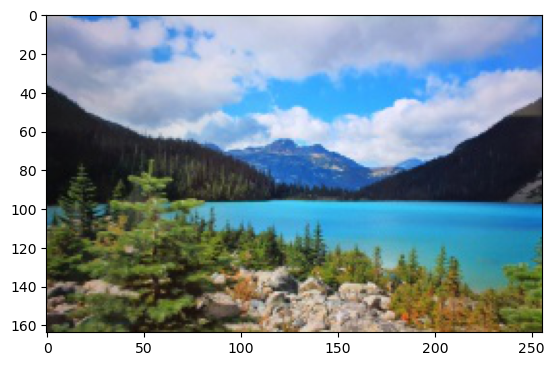

In [10]:
import imageio.v3 as iio
im = iio.imread('C:\\Work\\Teaching\\Machine Learning\\Data\scene256.jpg')
im=im.astype(float)/256
plt.imshow(im)

In [54]:
from scipy.sparse import lil_array,csr_matrix,diags
r,c,d=im.shape
n=r*c
si2=0.005
W=lil_array((n,n))
for i in range(r):
    for j in range(c-1):
        idx=i*c+j
        v1=im[i,j,:]
        v2=im[i,j+1,:]
        v=np.exp(-np.sum((v1-v2)**2)/si2)
        W[idx,idx+1]=v
        W[idx+1,idx]=v
for i in range(r-1):
    for j in range(c):
        idx=i*c+j
        v1=im[i,j,:]
        v2=im[i+1,j,:]
        v=np.exp(-np.sum((v1-v2)**2)/si2)
        W[idx,idx+c]=v
        W[idx+c,idx]=v

In [55]:
from scipy.sparse.linalg import svds
k=20
D=W.sum(axis=1)
D1=D**(-0.5)
D1=diags(D1)
W=csr_matrix(W)
L=D1@W@D1
u,d,vt=svds(L,k=k)
print(u)

[[-1.55691999e-05 -3.63938840e-05 -2.28970402e-05 ... -6.94567051e-04
   2.97914880e-03 -5.00554376e-03]
 [ 4.51168750e-05 -1.93447767e-05 -1.92984857e-07 ...  3.24877923e-03
   4.54465283e-03  2.31837137e-03]
 [-1.92836752e-05 -4.50766798e-05 -2.83597886e-05 ... -8.60276278e-04
   3.68991163e-03 -6.19976220e-03]
 ...
 [ 1.15662260e-05  2.70510259e-05 -3.14696026e-06 ... -7.14876836e-04
   3.06626280e-03 -5.15191154e-03]
 [-2.68757256e-05  1.15258187e-05 -2.05688118e-08 ...  2.68095638e-03
   3.75033655e-03  1.91316571e-03]
 [ 8.64214331e-06  2.02121974e-05 -2.35137229e-06 ... -5.34147350e-04
   2.29107458e-03 -3.84944616e-03]]


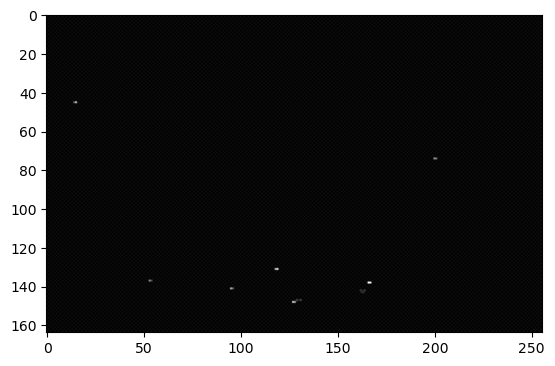

In [72]:
from sklearn.cluster import KMeans
k=20
x=u[:,:k]
nx=np.sum(x**2,axis=1)**0.5
x=x/nx.reshape(-1,1)
kmeans = KMeans(n_clusters=k, n_init="auto").fit(x)
plt.imshow(kmeans.labels_.reshape(r,c),cmap='gray')

In [69]:
im1=im.reshape(-1,3)

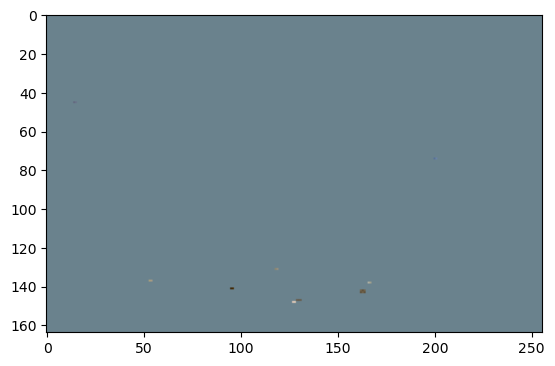

In [73]:
l=kmeans.labels_
im1=torch.tensor(im).float().reshape(-1,3)
m=torch.zeros(l.shape[0],3)
for i in range(k):
    mi=torch.mean(im1[l==i,:],dim=0)
    m[l==i,:]=mi
plt.imshow(m.reshape(r,c,3))

[10] loss: 64.587
[20] loss: 51.890
[30] loss: 48.051
[40] loss: 42.423
[50] loss: 40.288
[60] loss: 37.681
[70] loss: 34.589
[80] loss: 32.550
[90] loss: 27.062
[100] loss: 26.214
[110] loss: 13.247
[120] loss: 13.603
[130] loss: 12.708
[140] loss: 12.511
[150] loss: 12.395
[160] loss: 12.729
[170] loss: 12.147
[180] loss: 11.941
[190] loss: 12.952
[200] loss: 12.989
[210] loss: 7.115
[220] loss: 6.735
[230] loss: 6.738
[240] loss: 6.606
[250] loss: 6.727
[260] loss: 6.471
[270] loss: 6.468
[280] loss: 6.232
[290] loss: 6.319
[300] loss: 6.114
Finished Training


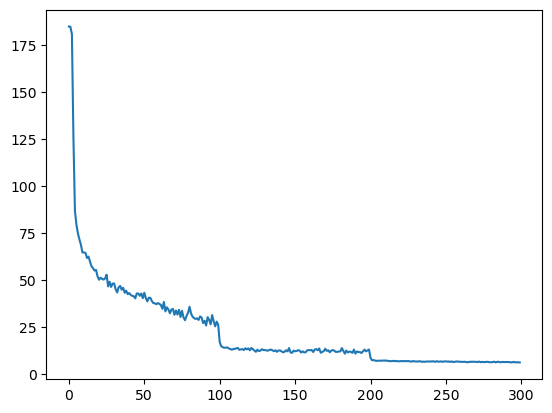

In [53]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc(x)
        return x
    
net=Net()
net=net.to(device)
n=x.shape[0]
criterion=nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100,200], gamma=0.2)
losses=[]
for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        xi, yi = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(xi).squeeze()
        loss = criterion(outputs, yi)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    running_loss = running_loss/n
    losses.append(running_loss)
    if epoch % 10 == 9:   
        print('[%d] loss: %1.3f'%(epoch+1,running_loss))
    scheduler.step()

plt.plot(losses)
print('Finished Training')

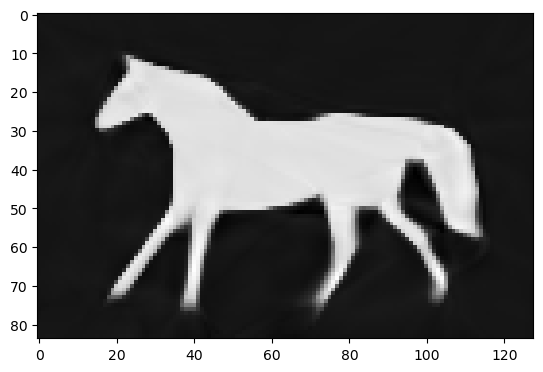

In [54]:
with torch.no_grad():
    py=net(x)
plt.imshow(py.reshape(r,c).cpu().numpy(),cmap='gray')

In [68]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [62]:
x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(300, 20000) (300,) (300, 20000) (300,)


In [50]:
x = np.loadtxt("d:/datasets/uci/hill-valley/x.dat")
y = np.loadtxt("d:/datasets/uci/hill-valley/y.dat", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/hill-valley/xtest.dat")
yt = np.loadtxt("d:/datasets/uci/hill-valley/ytest.dat", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(606, 100) (606,) (606, 100) (606,)


In [16]:
x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [69]:
sx=np.std(x,axis=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
print(x.shape)
x=torch.tensor((x-mx)/sx).float()
xt=torch.tensor((xt-mx)/sx).float()
y=torch.tensor(y).float()
yt=torch.tensor(yt).float()
print(torch.std(x,axis=0))

(2000, 500)
tensor([1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.00

In [70]:
n=x.shape[0]
nt=xt.shape[0]
y1=y.clone()
yt1=yt.clone()

In [71]:
y[y<0]=0
yt[yt<0]=0

In [72]:
x,y,y1=x.to(device),y.to(device),y1.to(device)
xt,yt,yt1=xt.to(device),yt.to(device),yt1.to(device)